#                                  *PROBLEM STATEMENT*

                                     
Subsidy Inc. delivers subsidies to individuals based on their income. 
Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters. 
Susbidy Inc. wants us to: *Develop an income classifier system for individuals*



# MAIN OBJECTIVE

                                    
Simplify the data system by reducing the number of variables to be studied, without sacrificing too much accuracy. Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse.                                      

*PROBLEM CONCEPTUALIZATION* - Develop an income classifier for individuals with reduced number of varaibles.


*PROBLEM CHARACTERIZATION* - Classification

We will now import the necessary libraries required to work with the data.

In [1]:
#To work with dataframes
import pandas as pd

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sns
import matplotlib.pyplot as plt

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - acuracy score & confusion matrix 
from sklearn.metrics import accuracy_score, confusion_matrix

Our raw data is stored in the file named 'income.csv'. We will now import it and convert it into dataframe for further processing.

In [2]:
# Importing data
data_income = pd.read_csv('income.csv')

# Creating a copy of original data
data = data_income.copy()

Now we will perform Exloratory Data Analysis on the copy of original data.
We will perform the following tasks : - 
1. Getting to know the Data,
2. Data preprocessing (Missing values)
3. Cross tables and data visualization. 

# Getting to know the data

In [42]:
print(data.head()) # By default it shows the first 5 rows of the Data with all the columns

   age       JobType         EdType        maritalstatus       occupation  \
0   45       Private        HS-grad             Divorced     Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married     Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse   Prof-specialty   
3   27       Private            9th        Never-married     Craft-repair   
4   20       Private   Some-college        Never-married            Sales   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
0    Not-in-family   White   Female            0            0            28   
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   

    nativecountry                        SalStat  
0   United-

In [3]:
# To check variable's data type.
print(data.info())
print(data.shape) # We get to know the number of rows and columns in our data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None
(31978, 13)


We can see that there are 31978 rows and 13 columns in our dataset.

# VARIABLE DESCRIPTION


### age
* DataType - integer
* Description - The age of individual in years.

### JobType
* DataType - string
* Description - Working status of person, which sector does he work in.

### EdType
* DataType - string
* Description - The highes level of education person possess.

### maritalstatus
* DataType - string
* Description - The marital status of the individual

### occupation
* DataType - string
* Description - The type of work individual does

### relationship
* DataType - string
* Description - Relationship of individual to his/her household

### race
* DataType - string
* Description - The individual's race (Black, White & 3 more categories)

### gender
* DataType - string
* Description - The individual's gender

### capitalgain
* DataType - integer
* Description - The capital gains of the individual (from selling an asset such as a stock or bond for more than the original purchase price).

### capitalloss
* DataType - integer
* Description - The capital losses of the individual (from selling an asset such as a stock or bond for less than the original purchase price).

### hoursperweek
* DataType - integer
* Description - The number of hours individual works per week.

### nativecountry
* DataType - integer
* Description - The native country of the individual.

### SalStat
* DataType - integer
* Description - The outcome variable indicating whether a person's salary status is greater than 50,000 or less than, equal to 50,000 $.





In [4]:
print(data['JobType'])

0                  Private
1              Federal-gov
2                  Private
3                  Private
4                  Private
5                  Private
6                  Private
7                  Private
8                        ?
9                  Private
10            Self-emp-inc
11                 Private
12        Self-emp-not-inc
13                 Private
14                 Private
15                 Private
16                 Private
17                       ?
18                 Private
19               Local-gov
20                 Private
21                 Private
22                 Private
23                 Private
24                 Private
25                 Private
26                 Private
27                 Private
28                 Private
29                       ?
               ...        
31948              Private
31949              Private
31950              Private
31951            State-gov
31952              Private
31953              Private
3

In [5]:
# Check for missing values
data.isnull() 
# isnull function returns the boolean output, True indicates missing data, 
# False indicates NO missing data, in a particular cell.


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
print('Data columns with null values:\n', data.isnull().sum())
# no missing values 
# This command is used to see sum of missing values in each column.
# We use this because it is difficult to skim and find missing values using isnull command.

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


* Initial Observation - no missing values 
* This command is used to see sum of missing values in each column.
* We use this because it is difficult to skim and find missing values using isnull command.

### Here we observe that there are no missing values in our data. Which implies that our data is quite neat. Later we will see that there are missing values. 

In [51]:
# summary of numerical variables
summary_num = data.describe()
print(summary_num)
# This function gives us a descriptive statistics about our data.

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [43]:
# summary of categorical variables
summary_cate = data.describe(include = ["O"]) # including object datatype as well.
print(summary_cate)


# This gives us 4 measures, which are :-
# count - count the total data input in that column
# unique - counts the total number of unique categories in a particular column
# top - It gives us the most frequently occuring catgory in a particular column 
# freq - returns the frequency of top category (Most frequently occuring category)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [7]:
# Frequency of each characters
data['JobType'].value_counts()
# Gives the frequency of each category under the variable JobType. 
# ? mark indicates the NaN value, by default python reads Blank cell as NaN.


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [8]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
# checking for unique classes
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))
# There exists ' ?' instead of nan

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


### We will go back and read the data by including "na_values['?']" to consider ' ?' as nan value.

In [5]:
data = pd.read_csv('income.csv', na_values=[" ?"]) 
# We will consider this special character "?" as NaN value.

# Data pre-processing

In [6]:
data.isnull().sum()
# Here we can see that only 'JobType' and 'occupation' variables have missing data.

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [12]:
missing = data[data.isnull().any(axis=1)]
# axis = 1 => to consider at least one column value is missing
missing.shape
print(missing)

       age JobType         EdType           maritalstatus occupation  \
8       17     NaN           11th           Never-married        NaN   
17      32     NaN   Some-college      Married-civ-spouse        NaN   
29      22     NaN   Some-college           Never-married        NaN   
42      52     NaN           12th           Never-married        NaN   
44      63     NaN        1st-4th      Married-civ-spouse        NaN   
57      72     NaN        HS-grad      Married-civ-spouse        NaN   
69      53     NaN        5th-6th                 Widowed        NaN   
73      57     NaN      Assoc-voc                 Widowed        NaN   
75      20     NaN   Some-college           Never-married        NaN   
76      21     NaN   Some-college           Never-married        NaN   
97      34     NaN        HS-grad           Never-married        NaN   
133     18     NaN           12th           Never-married        NaN   
137     65     NaN   Some-college      Married-civ-spouse       

### Here we noticed that whenever JobType is nan, the occupation is also NaN. Also, there is a category in 'JobType' called 'Never-worked', and whenever this category occurs the occupation corresponds to NaN value.

 Points to note:
1. Missing values in Jobtype = 1809
2. Missing values in Occupation = 1816
3. There are 1809 rows where two specific coulmns
   i.e. occupation & JobType have missing values
4. (1816-1809) = 7 => You still have occupation unfilled for these 7 rows. 
   Because, jobtype is Never worked

In [7]:
data2 = data.dropna(axis=0) 
# by above command we are dropping all the rows which have missing values.
data2.shape

(30162, 13)

### Since we don't have any concrete idea to find the mechanism that goes behind to produce the missing values, we remove all such rows which contains missing values (1816 rows).

In [14]:
# Relationship between independent variables
correlation = data2.corr()
print(correlation)
# Correlation close to 0 implies very low correlation. 
# Correlation close to 1 implies very high correlation. 

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


### Here, we can see that correlation values are close to zero, which means that none of the variables are correlated to each other.

# Cross tables & Data Visualization 

In [34]:
# Extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [42]:
# gender proportion table:

gender = pd.crosstab(index    = data2["gender"],
                     columns  = 'count',
                     normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


### This gives us an idea that we have roughly 67% male and 33% female gender.

In [46]:
# Gender vs Salary status:

gender_salstat = pd.crosstab(index     = data2["gender"],
                             columns   = data2['SalStat'],
                             margins   = True,
                             normalize = 'index') # include row and column totals
print(gender_salstat)
# by setting normalize = 'index' we get sum of columns in a row to be 1

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


### This implies that men are more likely to earn more than 50,000 as compared to women.

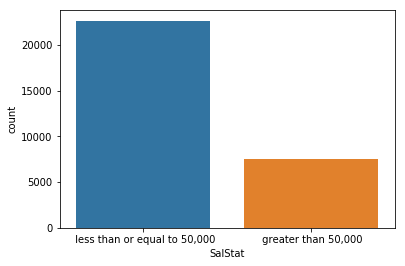

In [44]:
# Frequency distribution of 'Salary status'

SalStat = sns.countplot(data2['SalStat'])
plt.show()

### 75 % of people's salary status is <= 50,000 & 25% of people's salary status is > 50,000

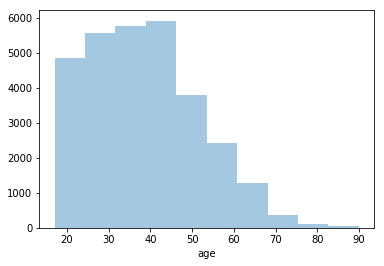

In [48]:
##################### HISTOGRAM OF AGE ###########################

sns.distplot(data2['age'], bins=10, kde=False)
plt.show()

# By putting kde = False, we have frequency in the y-axis.
# People with age 20-45 are high in frequency

### People with age 20-45 are high in frequency

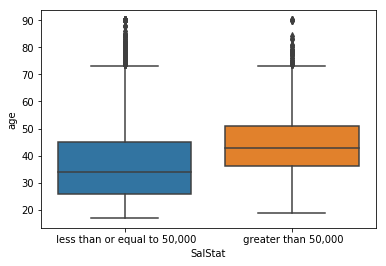

In [50]:
##################### Box Plot - Age vs Salary status  #################
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()
plt.show()

### People with 35 - 50 age are more likely to earn > 500000 dollars
### People with 25-35 age are more likely to earn <= 50000 dollars 

In [54]:
# JobType vs Salary status:

jobtype_salstat = pd.crosstab(index     = data2["JobType"],
                             columns   = data2['SalStat'],
                             margins   = True,
                             normalize = 'index') # include row and column totals
print(jobtype_salstat)
# by setting normalize = 'index' we get sum of columns in a row to be 1
# Plot a bar graph also between these two variables.

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000
All                            0.248922                       0.751078


### From the above table it is visible that 56% of self employed people earn more than 50000 USD per year.
### Hence JobType is an important variable in avoiding the misude of subsidies.

In [60]:
# Education vs Salary status:

edu_salstat = pd.crosstab(index     = data2["EdType"],
                             columns   = data2['SalStat'],
                             margins   = True,
                             normalize = 'index') # include row and column totals
print(edu_salstat)
# by setting normalize = 'index' we get sum of columns in a row to be 1
# Plot a bar graph also between these two variables.

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

### From the above table we can see that people who have done Doctorate, Masters, Prof-school are more likely to earn above 50000 USD per year when compared to others. 
### Hence, EdType is an influencing variable in avoiding the misuse of subsidies.

In [61]:
# Occupation vs Salary status:

occup_salstat = pd.crosstab(index     = data2["occupation"],
                             columns   = data2['SalStat'],
                             margins   = True,
                             normalize = 'index') # include row and column totals
print(occup_salstat)
# by setting normalize = 'index' we get sum of columns in a row to be 1
# Plot a bar graph also between these two variables.

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

### Those who make more than 50000 USD per year are more likely to work managers and professionals.
### Hence, occupation is also an important variable in avoiding the subsidies.

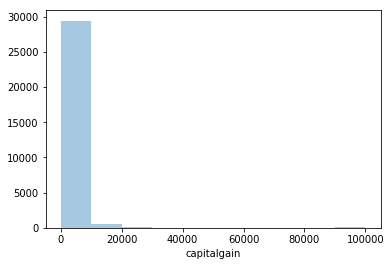

In [62]:
##################### HISTOGRAM OF CAPITAL GAIN ###########################

sns.distplot(data2['capitalgain'], bins=10, kde=False)
plt.show()


### 92 % (27611 individuals) of the capital gain is 0. This could be an important variable in classifying the salary status of individuals.

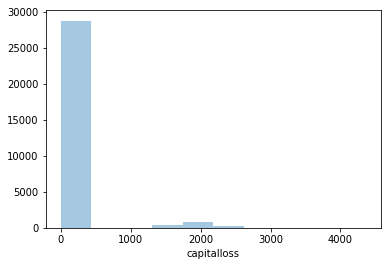

In [63]:
##################### HISTOGRAM OF CAPITAL LOSS ###########################

sns.distplot(data2['capitalloss'], bins=10, kde=False)
plt.show()


### 95% (28721) of the capital loss is 0. Meaning 28721 individuals have capital loss 0.
### We will include this in our model and see whether it could be an important variable or not.

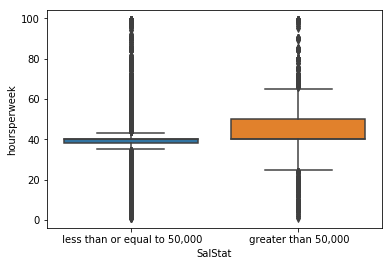

In [64]:
##################### Box Plot - Hours per week vs Salary status  #################
sns.boxplot('SalStat', 'hoursperweek', data=data2)
data2.groupby('SalStat')['hoursperweek'].median()
plt.show()

### From the plot it is clearly visible that those who earn more than 50000 USD per year are more likely to spend 40-50 hours per week in the company.
### This variable can contribute in classifying the individual's salary status since there is association between salary status and hours per week.

# LOGISTIC REGRESSION

Using Logistic Regression we will build up a classifier model based on the available data.

In [8]:
# Reindexing the salary status names to 0,1
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])
# Here 'SalStat' is our target variable.

0        0
1        0
2        1
3        0
4        0
5        0
6        0
7        0
9        0
10       1
11       1
12       1
13       1
14       0
15       0
16       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       1
28       1
30       0
31       0
32       0
        ..
31946    0
31947    0
31948    0
31949    0
31950    1
31951    0
31952    1
31953    0
31954    0
31955    0
31956    0
31957    0
31958    0
31959    1
31960    0
31961    0
31962    0
31963    0
31964    0
31965    1
31966    0
31969    0
31970    1
31971    0
31972    1
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


/Users/parthrajauria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
data2.shape

(30162, 13)

In [9]:
new_data=pd.get_dummies(data2, drop_first=True)

new_data.shape

(30162, 95)

* This method is called one hot encoding.
* get_dummies method converts all the categorical features to 0 and 1. For example, JobType column has been splitted into seven columns (as there were 7 categories inside JobType) in order to covert data into 0 and 1 form.

In [18]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [11]:
# Seperating the input names from data 
features=list(set(columns_list)-set(['SalStat']))
print(features)


['nativecountry_ Jamaica', 'nativecountry_ Germany', 'nativecountry_ Haiti', 'maritalstatus_ Separated', 'EdType_ Assoc-voc', 'nativecountry_ Laos', 'EdType_ Some-college', 'nativecountry_ Canada', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Married-civ-spouse', 'occupation_ Priv-house-serv', 'JobType_ Private', 'occupation_ Armed-Forces', 'nativecountry_ Portugal', 'nativecountry_ Italy', 'EdType_ Doctorate', 'occupation_ Transport-moving', 'hoursperweek', 'maritalstatus_ Widowed', 'nativecountry_ Greece', 'EdType_ 5th-6th', 'nativecountry_ Ireland', 'occupation_ Exec-managerial', 'JobType_ State-gov', 'relationship_ Wife', 'relationship_ Not-in-family', 'nativecountry_ United-States', 'occupation_ Tech-support', 'nativecountry_ Japan', 'nativecountry_ Iran', 'race_ White', 'age', 'nativecountry_ England', 'relationship_ Unmarried', 'EdType_ HS-grad', 'EdType_ Preschool', 'maritalstatus_ Never-married', 'occupation_ Handlers-cleaners', 'EdType_ 9th', 'nativecountry_ Scotla

In [12]:
# Storing the output value in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ..., 0 0 0]


In [13]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]


In [14]:
# splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x ,y, test_size = 0.3, random_state = 0)
# we fix random state to one particular value so that each time this block of code runs, the same set of rows will be 
# chosen in train-test split.

In [15]:
# Make an instance of the Model
logistic = LogisticRegression()

In [16]:
# Fitting the values for x and y
logistic.fit(train_x, train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
logistic.coef_

array([[  7.88321260e-03,   1.42229455e-01,  -4.75424070e-02,
         -3.96856189e-01,   1.22166520e-01,  -3.18863085e-02,
         -9.49648868e-02,   6.53315750e-02,  -1.19341262e-01,
          7.86915317e-01,  -2.15912543e-01,  -5.06245899e-01,
         -1.75427051e-02,  -9.69136033e-02,   6.41178865e-02,
          1.36246177e+00,  -3.42209202e-01,   2.67760878e-02,
         -1.40720062e-01,  -9.31763537e-02,  -6.99955247e-01,
         -9.40479883e-03,   6.84768759e-01,  -7.74343159e-01,
          9.98676703e-01,  -8.04790217e-01,  -4.78376288e-02,
          6.63816515e-01,   1.43590010e-02,  -3.56188435e-02,
         -5.11589887e-01,   2.27140229e-02,   8.64744881e-02,
         -9.00526581e-01,  -3.65320755e-01,  -1.88773558e-01,
         -6.07985018e-01,  -9.16813727e-01,  -8.57385897e-01,
         -3.94355924e-02,  -6.22544385e-02,  -3.10793257e-03,
         -9.03687127e-01,  -2.48517379e-01,   3.12680624e-04,
          1.83587582e-01,  -9.58529180e-01,  -6.82630498e-02,
        

In [18]:
logistic.intercept_

array([-3.03632535])

In [19]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ..., 0 0 0]


In [20]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6332  491]
 [ 936 1290]]


### Here, we observe that 491 and 936 are the misclassifications done by the model.

In [21]:
# Calculating the accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.842303016908


### It means that 84% of time, model is able to classify correctly.

In [22]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1427


In [20]:
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
5        0
6        0
7        0
9        0
10       1
11       1
12       1
13       1
14       0
15       0
16       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       1
28       1
30       0
31       0
32       0
        ..
31946    0
31947    0
31948    0
31949    0
31950    1
31951    0
31952    1
31953    0
31954    0
31955    0
31956    0
31957    0
31958    0
31959    1
31960    0
31961    0
31962    0
31963    0
31964    0
31965    1
31966    0
31969    0
31970    1
31971    0
31972    1
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


# LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES

We will build another Logistic Regression Model, but by removing insignificant variables.

In [55]:
cols = ['gender', 'nativecountry', 'race', 'JobType']
new_data2 = data2.drop(cols, axis=1)
print(new_data2)

       age         EdType           maritalstatus          occupation  \
0       45        HS-grad                Divorced        Adm-clerical   
1       24        HS-grad           Never-married        Armed-Forces   
2       44   Some-college      Married-civ-spouse      Prof-specialty   
3       27            9th           Never-married        Craft-repair   
4       20   Some-college           Never-married               Sales   
5       44        HS-grad                 Widowed     Exec-managerial   
6       51        HS-grad      Married-civ-spouse        Craft-repair   
7       20        HS-grad      Married-civ-spouse   Machine-op-inspct   
9       19        HS-grad           Never-married   Machine-op-inspct   
10      45   Some-college      Married-civ-spouse        Craft-repair   
11      60        HS-grad      Married-civ-spouse        Craft-repair   
12      44        HS-grad      Married-civ-spouse               Sales   
13      40      Assoc-voc      Married-civ-spouse  

In [56]:
new_data2.shape

(30162, 9)

In [57]:
new_data2=pd.get_dummies(new_data2, drop_first=True)

In [58]:
new_data2.shape

(30162, 44)

Observe that now we have only 44 columns instead of 95 previously.

In [60]:
# Storing the column names
columns_list=list(new_data2.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [61]:
# Seperating the input names from data 
features=list(set(columns_list)-set(['SalStat']))
print(features)

['maritalstatus_ Separated', 'EdType_ Assoc-voc', 'occupation_ Prof-specialty', 'EdType_ Some-college', 'maritalstatus_ Married-spouse-absent', 'occupation_ Sales', 'EdType_ 7th-8th', 'maritalstatus_ Married-civ-spouse', 'occupation_ Protective-serv', 'occupation_ Priv-house-serv', 'EdType_ Assoc-acdm', 'EdType_ Masters', 'occupation_ Armed-Forces', 'EdType_ Doctorate', 'occupation_ Transport-moving', 'hoursperweek', 'maritalstatus_ Widowed', 'capitalloss', 'EdType_ 5th-6th', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Other-service', 'relationship_ Wife', 'relationship_ Own-child', 'relationship_ Not-in-family', 'EdType_ 12th', 'occupation_ Tech-support', 'EdType_ Prof-school', 'age', 'EdType_ Preschool', 'EdType_ HS-grad', 'occupation_ Machine-op-inspct', 'relationship_ Unmarried', 'EdType_ 1st-4th', 'maritalstatus_ Never-married', 'occupation_ Handlers-cleaners', 'EdType_ 9th', 'occupation_ Craft-repair', 'EdType_ 11th', 'relationship_ Other-relative',

In [62]:
# Storing the output value in y
y = new_data2['SalStat'].values
print(y)

[0 0 1 ..., 0 0 0]


In [63]:
# Storing the values from input features
x = new_data2[features].values

# splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x ,y, test_size = 0.3, random_state = 0)
# Make an instance of the Model
logistic = LogisticRegression()

In [64]:
# Fitting the values for x and y
logistic.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
# Prediction from test data
prediction1 = logistic.predict(test_x)
print(prediction1.shape)



(9049,)


In [66]:
type(test_y)

numpy.ndarray

In [67]:
type(prediction1)

numpy.ndarray

In [68]:
# Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cfm1 = confusion_matrix(test_y.tolist(), prediction1.tolist())
print(cfm1)

[[6317  506]
 [ 952 1274]]


In [70]:
# Calculating the accuracy

acc_score = accuracy_score(test_y.tolist(), prediction1.tolist())
print(acc_score)

0.838877224003


In [71]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction1).sum())

Misclassified samples: 1458


We can observe that accuracy decreases slightly and the misclassified samples increased from 1427 to 1458. However, this is a very mere (insignificant) decline in accuracy, therefore it is good decision to remove the insignificant variables as doing that decreases the computational complexity of model and doesn't affect accuracy much, therefore making our model Faster.

# KNN

In [72]:
# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier

# importing library for plotting
import matplotlib.pyplot as plt

In [73]:
# creating a k nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

# Fitting the values for x and y
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [74]:
# Predicting the test values with model
prediction = KNN_classifier.predict(test_x)

# Performance metric check
confusion_matrix = confusion_matrix(test_y, prediction)
print("\t", "predicted values")
print("Original Values", "\n", confusion_matrix)


	 predicted values
Original Values 
 [[6185  638]
 [ 866 1360]]


In [75]:
# Calculating the accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction).sum())

0.833793789369
Misclassified samples: 1504


## Let's check the Effect of K value on Classifier

In [76]:
Misclassified_sample = []
# Calculating errors for k value between 1 and 20
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
print(Misclassified_sample)    

[1714, 1507, 1572, 1475, 1504, 1431, 1465, 1450, 1456, 1423, 1473, 1452, 1454, 1434, 1449, 1440, 1441, 1422, 1446]


Hence, we can observe that the best accuracy is achieved when n_neighbors = 10, corresponding to 1423 misclassified points.

In [81]:
import matplotlib.pyplot as plt
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_y)
    scores.append(knn.score(test_x, test_y))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30]);

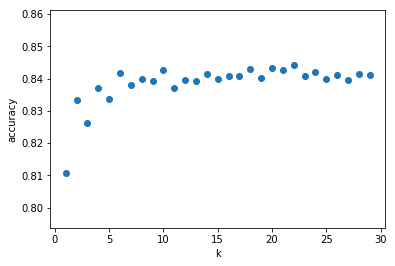

In [82]:
plt.show()

# CONCLUSION

In this project, we build classifiers using Logistice Regression and KNN classifiers to decide subsidy status for individuals based on demographic and financial parameters.

# END OF PROJECT

## This Project is part of NPTEL Course 'Python for DataScience' by  Prof. Raghunathan Rengasamy from IIT MADRAS.